# Capstone Project - The Battle of Neighborhoods - Restaurants in Mumbai

# 1. Data collection
  

In [3]:
import os # Operating System
import numpy as np
import pandas as pd
import datetime as dt # Datetime
import json # library to handle JSON files

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium #import folium # map rendering library

print('Libraries imported.')

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Libraries imported.


### * Read the Zomato data into dataframe using Pandas

In [181]:
df= pd.read_csv("zomato_mum.csv")


In [182]:
df.head()

,Additional_outlet_count,Call,Cost_for_two(Rs.),Cuisines,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,...,Delivery_Time(mins),Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Feature_Count,Res_Type_Count,Competitors_in_Location,Score
0,1.0,True,1500,"Finger Food, Continental, European, Italian","Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",...,NaN,4.9,1326,Excellent,True,4,2,2,19.0,48.000806
1,1.0,True,800,Pizza,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,...,NaN,4.6,5974,Excellent,True,1,2,1,209.0,71.950295
2,NaN,True,2500,Seafood,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",Bandra West,Bastian,"Casual Dining,Bar",...,NaN,4.5,1438,Excellent,False,1,2,2,241.0,43.160370
3,NaN,True,1800,"Finger Food, Continental","Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,"Lounge,Bar",...,NaN,4.9,3275,Excellent,True,2,3,2,125.0,59.778427
4,2.0,True,450,"North Indian, Street Food, Fast Food, Chinese",NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,...,45.0,4.1,1422,Very Good,False,4,1,1,116.0,37.546442


In [183]:
df=df[df['Restaurant_Location'] != 'Kamala Mills Compound']
df=df[df['Restaurant_Location'] != 'Flea Bazaar Café']
df=df[df['Restaurant_Location'] != 'Mohammad Ali Road']
df=df[df['Restaurant_Location'] != 'Kalwa']
df=df[df['Restaurant_Location'] != 'Panch Pakhadi']
df=df[df['Restaurant_Location'] != 'Near Andheri West Station']
df=df[df['Restaurant_Location'] != 'Sakinaka']
df=df[df['Restaurant_Location'] != 'Near Andheri East Station']
df=df[df['Restaurant_Location'] != 'Mahakali']
df=df[df['Restaurant_Location'] != 'Veera Desai Area']
df=df[df['Restaurant_Location'] != 'Charni Road']
df=df[df['Restaurant_Location'] != 'Mumbai CST Area']
df=df[df['Restaurant_Location'] != 'Azad Nagar']
df=df[df['Restaurant_Location'] != '4 Bungalows']
df=df[df['Restaurant_Location'] != 'Ghodbunder Road']
df=df[df['Restaurant_Location'] != 'Mira Road']
df=df[df['Restaurant_Location'] != 'Runwal Green']
df=df[df['Restaurant_Location'] != 'Grant Road']
df=df[df['Restaurant_Location'] != 'Marve']
df=df[df['Restaurant_Location'] != 'Panvel']
df=df[df['Restaurant_Location'] != 'Alibaug']
df=df[df['Restaurant_Location'] != 'Majiwada']
df=df[df['Restaurant_Location'] != 'Reclamation']
df=df[df['Restaurant_Location'] != 'Peddar Road']
df=df[df['Restaurant_Location'] != 'Dadar Shivaji Park']
df=df[df['Restaurant_Location'] != 'Ulhasnagar']
df=df[df['Restaurant_Location'] != 'Nalasopara']
df=df[df['Restaurant_Location'] != 'Ambernath']
df.head()

,Additional_outlet_count,Call,Cost_for_two(Rs.),Cuisines,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,...,Delivery_Time(mins),Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Feature_Count,Res_Type_Count,Competitors_in_Location,Score
1,1.0,True,800,Pizza,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,...,NaN,4.6,5974,Excellent,True,1,2,1,209.0,71.950295
2,NaN,True,2500,Seafood,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",Bandra West,Bastian,"Casual Dining,Bar",...,NaN,4.5,1438,Excellent,False,1,2,2,241.0,43.160370
3,NaN,True,1800,"Finger Food, Continental","Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,"Lounge,Bar",...,NaN,4.9,3275,Excellent,True,2,3,2,125.0,59.778427
4,2.0,True,450,"North Indian, Street Food, Fast Food, Chinese",NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,...,45.0,4.1,1422,Very Good,False,4,1,1,116.0,37.546442
5,NaN,True,1600,"Modern Indian, European, Pizza, Grill","Best of Mumbai, Food Hygiene Rated Restaurants...",False,1pm – 1am (Mon-Sun),Bandra West,JLWA,"Casual Dining,Bar",...,NaN,4.8,1989,Excellent,True,4,2,2,241.0,50.627941


In [184]:
df_loc=df['Restaurant_Location'].dropna().unique()
df_loc

array(['Malad West', 'Bandra West', 'Lower Parel', 'Vashi',
       'Bandra Kurla Complex', 'Juhu', 'Cuffe Parade', 'Andheri West',
       'Powai', 'Dadar East', 'Santacruz West', 'Fort', 'Khar', 'Marol',
       'Borivali West', 'Churchgate', 'Byculla', 'Kandivali West',
       'Colaba', 'Sion', 'Worli', 'Chowpatty', 'Goregaon West',
       'Marine Lines', 'Jogeshwari', 'Dadar West', 'Breach Candy',
       'Matunga East', 'Thane West', 'Kandivali East', 'Mulund West',
       'Goregaon East', 'Airoli', 'Nariman Point', 'Mahim', 'Tardeo',
       'Ghatkopar East', 'Virar', 'Mahalaxmi', 'Chembur', 'Kurla',
       'Ghatkopar West', 'Vile Parle West', 'Bhandup', 'Chakala',
       'CBD-Belapur', 'Bandra', 'Vasai', 'Kharghar', 'Malad East',
       'Dahisar East', 'Kopar Khairane', 'Kalbadevi', 'Vile Parle East',
       'Seawoods', 'Dahisar West', 'Kemps Corner', 'Mulund East',
       'Sanpada', 'Borivali East', 'Santacruz East', 'Girgaum', 'Nerul',
       'Prabhadevi', 'Kalyan', 'Parel', 'Bhaya

### * Extract unique locations into a new dataframe

In [185]:
df1= pd.DataFrame(df_loc,columns =['Location'])
df1.set_index
df1.index = np.arange(1, len(df1) + 1)

df1

,Location
1,Malad West
2,Bandra West
3,Lower Parel
4,Vashi
5,Bandra Kurla Complex
6,Juhu
7,Cuffe Parade
8,Andheri West
9,Powai
10,Dadar East


In [186]:
df1['Location']= df1['Location'].astype(str)+ ',Mumbai'
df1.head()

,Location
1,"Malad West,Mumbai"
2,"Bandra West,Mumbai"
3,"Lower Parel,Mumbai"
4,"Vashi,Mumbai"
5,"Bandra Kurla Complex,Mumbai"


In [187]:
df_split = np.array_split(df1, 6)

## 2. Adding Geopy Data
### Get their respective coordinates using Geolocator

In [188]:
l1=df_split[0]
l1['coordinates'] = l1['Location'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
l1[['Latitude', 'Longitude']] = l1['coordinates'].apply(pd.Series)
l1.drop(['coordinates'], axis=1, inplace=True)
l1

,Location,Latitude,Longitude
1,"Malad West,Mumbai",19.184013,72.841216
2,"Bandra West,Mumbai",19.058336,72.830267
3,"Lower Parel,Mumbai",18.996332,72.830860
4,"Vashi,Mumbai",19.075713,73.000354
5,"Bandra Kurla Complex,Mumbai",19.067115,72.865724
6,"Juhu,Mumbai",19.107021,72.827528
7,"Cuffe Parade,Mumbai",18.913641,72.820930
8,"Andheri West,Mumbai",19.117249,72.833968
9,"Powai,Mumbai",19.118720,72.907348
10,"Dadar East,Mumbai",19.016253,72.852227


In [189]:
l2=df_split[1]
l3= df_split[2]
l4= df_split[3]
l5=df_split[4]
l6=df_split[5]

In [190]:
l2['coordinates'] = l2['Location'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
l2[['Latitude', 'Longitude']] = l2['coordinates'].apply(pd.Series)
l2.drop(['coordinates'], axis=1, inplace=True)
l2.head()

,Location,Latitude,Longitude
17,"Byculla,Mumbai",18.976622,72.832794
18,"Kandivali West,Mumbai",19.208380,72.842227
19,"Colaba,Mumbai",18.915091,72.825969
20,"Sion,Mumbai",19.046521,72.863283
21,"Worli,Mumbai",19.011696,72.818070


In [191]:
l3['coordinates'] = l3['Location'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
l3[['Latitude', 'Longitude']] = l3['coordinates'].apply(pd.Series)
l3.drop(['coordinates'], axis=1, inplace=True)
l3.head()

,Location,Latitude,Longitude
33,"Airoli,Mumbai",19.151749,72.974477
34,"Nariman Point,Mumbai",18.925951,72.823208
35,"Mahim,Mumbai",19.042314,72.839834
36,"Tardeo,Mumbai",18.972269,72.820498
37,"Ghatkopar East,Mumbai",19.083490,72.912025


In [193]:
l4['coordinates'] = l4['Location'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
l4[['Latitude', 'Longitude']] = l4['coordinates'].apply(pd.Series)
l4.drop(['coordinates'], axis=1, inplace=True)
l4.head()


,Location,Latitude,Longitude
48,"Vasai,Mumbai",19.384929,72.897546
49,"Kharghar,Mumbai",19.025773,73.059185
50,"Malad East,Mumbai",19.186022,72.856318
51,"Dahisar East,Mumbai",19.248693,72.864059
52,"Kopar Khairane,Mumbai",19.102852,73.003075


In [195]:
l5['coordinates'] = l5['Location'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
l5[['Latitude', 'Longitude']] = l5['coordinates'].apply(pd.Series)
l5.drop(['coordinates'], axis=1, inplace=True)
l5.head()

,Location,Latitude,Longitude
63,"Nerul,Mumbai",19.033612,73.018140
64,"Prabhadevi,Mumbai",19.014881,72.827956
65,"Kalyan,Mumbai",19.137892,72.810668
66,"Parel,Mumbai",19.009482,72.837661
67,"Bhayandar,Mumbai",19.197152,72.811366


In [196]:
l6['coordinates'] = l6['Location'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
l6[['Latitude', 'Longitude']] = l6['coordinates'].apply(pd.Series)
l6.drop(['coordinates'], axis=1, inplace=True)
l6.head()

,Location,Latitude,Longitude
78,"Mumbai Central,Mumbai",18.969586,72.819315
79,"New Panvel,Mumbai",18.938771,72.835335
80,"Dombivali,Mumbai",19.216288,73.091647
81,"Kalamboli,Mumbai",19.056634,73.098224
82,"Kamothe,Mumbai",19.016434,73.080655


In [197]:
frames = [l1,l2,l3,l4,l5,l6]

df_final = pd.concat(frames)
df_final.head()

,Location,Latitude,Longitude
1,"Malad West,Mumbai",19.184013,72.841216
2,"Bandra West,Mumbai",19.058336,72.830267
3,"Lower Parel,Mumbai",18.996332,72.830860
4,"Vashi,Mumbai",19.075713,73.000354
5,"Bandra Kurla Complex,Mumbai",19.067115,72.865724


In [209]:
df_f= df_final.replace(regex=[',Mumbai'], value=' ')

In [210]:
df_f

,Location,Latitude,Longitude
1,Malad West,19.184013,72.841216
2,Bandra West,19.058336,72.830267
3,Lower Parel,18.996332,72.830860
4,Vashi,19.075713,73.000354
5,Bandra Kurla Complex,19.067115,72.865724
6,Juhu,19.107021,72.827528
7,Cuffe Parade,18.913641,72.820930
8,Andheri West,19.117249,72.833968
9,Powai,19.118720,72.907348
10,Dadar East,19.016253,72.852227


In [199]:
geolocator=Nominatim()


D:\DownloaDs\PYTHON\WPy64-3740\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


In [200]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

## 3.  Clustering localities in Mumbai


### Define Foursquare API and add credentials

In [214]:
CLIENT_ID = 'N3NRC3V5IYPMZIFIYVL301ZJCWERT02VTYPGOO4SO25KWAW4' # your Foursquare ID
CLIENT_SECRET = 'A33AQOJFHCSCWQYE01D5FGJGXYH13NPRRXQ5LTL3MWYSTAHK' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: N3NRC3V5IYPMZIFIYVL301ZJCWERT02VTYPGOO4SO25KWAW4
CLIENT_SECRET:A33AQOJFHCSCWQYE01D5FGJGXYH13NPRRXQ5LTL3MWYSTAHK


 ###        Get coordinates of Mumbai

In [215]:
address = 'Mumbai'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai are 18.9387711, 72.8353355.


### Visualize neighbourhoods in Mumbai

In [216]:
# create map of Mumbai using latitude and longitude values
map_mum = folium.Map(location=[latitude, longitude], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(df_f['Latitude'], df_f['Longitude'], df_f['Location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mum) 
    
map_mum

In [230]:
df_f.loc[92,'Location']

'Dadar '

### Finding the top 100 venues that are in Dadar within a radius of 500 meters

In [231]:
nb_latitude = df_f.loc[92, 'Latitude'] # neighborhood latitude value
nb_longitude = df_f.loc[92, 'Longitude'] # neighborhood longitude value

nb_name = df_f.loc[92, 'Location'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(nb_name, 
                                                               nb_latitude, 
                                                               nb_longitude))

Latitude and longitude values of Dadar  are 19.019282, 72.8428757.


In [232]:
LIMIT=100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    nb_latitude, 
    nb_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=N3NRC3V5IYPMZIFIYVL301ZJCWERT02VTYPGOO4SO25KWAW4&client_secret=A33AQOJFHCSCWQYE01D5FGJGXYH13NPRRXQ5LTL3MWYSTAHK&v=20180604&ll=19.019282,72.8428757&radius=500&limit=100'

In [233]:
results = requests.get(url).json()


In [234]:
# Function detemining category of venues
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [235]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()


,name,categories,lat,lng
0,Paaneri,Women's Store,19.020394,72.841131
1,Shree Krishna Batata Wada,Fast Food Restaurant,19.020152,72.842474
2,Wholesale Flower Market,Flower Shop,19.018041,72.841621
3,Trupti Pure Vegetarian,Vegetarian / Vegan Restaurant,19.021818,72.842519
4,Gomantak Restaurant,Maharashtrian Restaurant,19.023060,72.842203


In [229]:
nearby_venues



,name,categories,lat,lng
0,Gupta's Bhel and Pani Puri House,Snack Place,19.184527,72.845946
1,Liberty Garden (लिबर्टी गार्डन),Garden,19.188200,72.840900
2,Gelato,Ice Cream Shop,19.184259,72.840098
3,Shree Dutt Snacks (श्री दत्त),Fast Food Restaurant,19.187563,72.842250


In [236]:
print ('{} unique categories in Dadar '.format(nearby_venues['categories'].value_counts().shape[0]))


19 unique categories in Dadar 


In [237]:
print (nearby_venues['categories'].value_counts()[0:10])


Indian Restaurant           5
Fast Food Restaurant        3
Coffee Shop                 2
Movie Theater               2
Café                        2
Farmers Market              2
Flower Shop                 1
Plaza                       1
Maharashtrian Restaurant    1
Women's Store               1
Name: categories, dtype: int64


### Get all the neighbourgoods in Mumbai Metropolitan Region

In [238]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [239]:
Mum_venues = getNearbyVenues(names=df_f['Location'],
                                   latitudes=df_f['Latitude'],
                                   longitudes=df_f['Longitude']
                                  )

Malad West 
Bandra West 
Lower Parel 
Vashi 
Bandra Kurla Complex 
Juhu 
Cuffe Parade 
Andheri West 
Powai 
Dadar East 
Santacruz West 
Fort 
Khar 
Marol 
Borivali West 
Churchgate 
Byculla 
Kandivali West 
Colaba 
Sion 
Worli 
Chowpatty 
Goregaon West 
Marine Lines 
Jogeshwari 
Dadar West 
Breach Candy 
Matunga East 
Thane West 
Kandivali East 
Mulund West 
Goregaon East 
Airoli 
Nariman Point 
Mahim 
Tardeo 
Ghatkopar East 
Virar 
Mahalaxmi 
Chembur 
Kurla 
Ghatkopar West 
Vile Parle West 
Bhandup 
Chakala 
CBD-Belapur 
Bandra 
Vasai 
Kharghar 
Malad East 
Dahisar East 
Kopar Khairane 
Kalbadevi 
Vile Parle East 
Seawoods 
Dahisar West 
Kemps Corner 
Mulund East 
Sanpada 
Borivali East 
Santacruz East 
Girgaum 
Nerul 
Prabhadevi 
Kalyan 
Parel 
Bhayandar 
Andheri 
Bandra East 
Malabar Hill 
Dombivali East 
Matunga West 
Mazgaon 
Vikhroli 
Chandivali 
Ghansoli 
Old Panvel 
Mumbai Central 
New Panvel 
Dombivali 
Kalamboli 
Kamothe 
Gorai 
Thane East 
Mumbra 
Dombivali West 
Sewri 
Wada

In [241]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Mum_Venues_only_restaurant = Mum_venues[Mum_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Mum_Venues_only_restaurant.index = np.arange(1, len(Mum_Venues_only_restaurant )+1)



In [248]:
Mum_Venues_only_restaurant=Mum_Venues_only_restaurant[Mum_Venues_only_restaurant['Venue Category'] != 'Restaurant']

### Get the frequency of Restaurant Categories

In [249]:
print (Mum_Venues_only_restaurant['Venue Category'].value_counts())                                


Indian Restaurant                  191
Fast Food Restaurant                70
Chinese Restaurant                  48
Vegetarian / Vegan Restaurant       23
Italian Restaurant                  19
Asian Restaurant                    19
Seafood Restaurant                  15
Middle Eastern Restaurant            4
Mediterranean Restaurant             4
Japanese Restaurant                  4
Thai Restaurant                      3
French Restaurant                    3
Maharashtrian Restaurant             2
American Restaurant                  2
South Indian Restaurant              2
Mughlai Restaurant                   2
Mexican Restaurant                   1
German Restaurant                    1
Molecular Gastronomy Restaurant      1
Goan Restaurant                      1
Multicuisine Indian Restaurant       1
Tex-Mex Restaurant                   1
Bengali Restaurant                   1
Gujarati Restaurant                  1
Parsi Restaurant                     1
North Indian Restaurant  

In [250]:
print('There are {} uniques categories.'.format(len(Mum_Venues_only_restaurant['Venue Category'].unique())))


There are 27 uniques categories.


In [251]:
#dataframe of top 12 categories
Mum_Venues_Top = Mum_Venues_only_restaurant['Venue Category'].value_counts()[0:12].to_frame(name='frequency')
Mum_Venues_Top = Mum_Venues_Top.reset_index()
#Mumbai top 12 

Mum_Venues_Top.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Mum_Venues_Top

,Venue_Category,Frequency
0,Indian Restaurant,191
1,Fast Food Restaurant,70
2,Chinese Restaurant,48
3,Vegetarian / Vegan Restaurant,23
4,Italian Restaurant,19
5,Asian Restaurant,19
6,Seafood Restaurant,15
7,Middle Eastern Restaurant,4
8,Mediterranean Restaurant,4
9,Japanese Restaurant,4


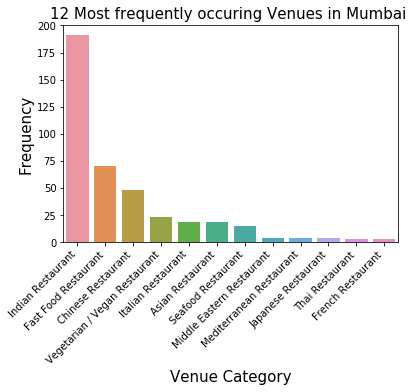

<Figure size 1800x720 with 0 Axes>

In [252]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Mum_Venues_Top)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('12 Most frequently occuring Venues in Mumbai ', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
#plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(25,10))
plt.show()

In [253]:
print ("Shape of the DF with Restaurant category: ", Mum_Venues_only_restaurant.shape)
Mum_Venues_only_restaurant.head(10)

Shape of the DF with Restaurant category:  (422, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Malad West,19.184013,72.841216,Shree Dutt Snacks (श्री दत्त),19.187563,72.842250,Fast Food Restaurant
2,Bandra West,19.058336,72.830267,Suzette,19.061526,72.829081,French Restaurant
3,Bandra West,19.058336,72.830267,Pali Bhavan,19.062089,72.829459,Indian Restaurant
4,Bandra West,19.058336,72.830267,Punjab Sweet House And Restaurant,19.062553,72.829423,Indian Restaurant
5,Bandra West,19.058336,72.830267,Wok Express,19.062320,72.829555,Chinese Restaurant
6,Bandra West,19.058336,72.830267,The Bandra Project,19.060332,72.829472,Italian Restaurant
7,Bandra West,19.058336,72.830267,Golconda Bowl,19.055977,72.834189,Indian Restaurant
8,Bandra West,19.058336,72.830267,Lemon Leaf,19.059542,72.829617,Asian Restaurant
9,Bandra West,19.058336,72.830267,Sahibaan,19.059374,72.829582,Indian Restaurant
10,Bandra West,19.058336,72.830267,Mamagoto,19.054876,72.828395,Asian Restaurant


In [254]:
Mum_Venues_restaurant = Mum_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())


In [255]:
Mum_Venues_restaurant

Neighborhood
Andheri                   4
Andheri East              6
Andheri West              7
Bandra                    6
Bandra East               4
Bandra Kurla Complex      7
Bandra West              27
Bhandup                   2
Borivali East             2
Borivali West             9
Breach Candy              3
Byculla                   4
CBD-Belapur               3
Chakala                   8
Chembur                  13
Churchgate               10
Colaba                    6
Cuffe Parade              6
Dadar                    10
Dadar East                1
Dadar West               16
Dahisar East              1
Dahisar West              3
Dombivali                 1
Dombivali East            1
Dombivali West            1
Fort                     19
Ghatkopar East            5
Ghatkopar West            3
Girgaum                  12
                         ..
Mahim                     3
Malabar Hill              1
Malad East                1
Malad West                1
Marine 

In [256]:
Mum_Venues_rest_df  = Mum_Venues_restaurant.to_frame().reset_index()
Mum_Venues_rest_df.columns = ['Neighborhood', 'Number of Restaurant']
Mum_Venues_rest_df.index = np.arange(1, len(Mum_Venues_rest_df)+1)
list_rest_no =Mum_Venues_rest_df['Number of Restaurant'].to_list()
list_dist =Mum_Venues_rest_df['Neighborhood'].to_list()
#print(list_rest_no)
#print(list_dist)

In [262]:
Mum_onehot = pd.get_dummies(Mum_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Mum_onehot['Neighborhood'] = Mum_Venues_only_restaurant['Neighborhood'] 
cols = Mum_onehot.columns.tolist()
cols = cols[-1:] + cols[:-1]
Mum_onehot = Mum_onehot[cols]
Mum_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Bengali Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Goan Restaurant,Gujarati Restaurant,...,Mughlai Restaurant,Multicuisine Indian Restaurant,North Indian Restaurant,Parsi Restaurant,Seafood Restaurant,South Indian Restaurant,Spanish Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
1,Malad West,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bandra West,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bandra West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bandra West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Bandra West,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
Mum_onehot.shape

(422, 28)

#### Grouping rows by neighborhood , by taking the mean of the frequency of occurrence of each category

In [265]:
Mum_grouped = Mum_onehot.groupby('Neighborhood').mean().reset_index()
Mum_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Bengali Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Goan Restaurant,Gujarati Restaurant,...,Mughlai Restaurant,Multicuisine Indian Restaurant,North Indian Restaurant,Parsi Restaurant,Seafood Restaurant,South Indian Restaurant,Spanish Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Andheri,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Andheri East,0.000000,0.000000,0.0,0.166667,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Andheri West,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
3,Bandra,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Bandra East,0.000000,0.000000,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Bandra Kurla Complex,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Bandra West,0.000000,0.111111,0.0,0.185185,0.074074,0.037037,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.037037
7,Bhandup,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Borivali East,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Borivali West,0.000000,0.111111,0.0,0.333333,0.111111,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111


### Size confirmation

In [266]:
Mum_grouped.shape


(75, 28)

### Top 5 venues in each Locality

In [279]:
num_venues = 5

for hood in Mum_grouped['Neighborhood']:
    print("-*-*-"+hood+"-*-*-")
    temp = Mum_grouped[Mum_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_venues))
    print('\n')

-*-*-Andheri -*-*-
                       venue  freq
0       Fast Food Restaurant   0.5
1          Indian Restaurant   0.5
2        American Restaurant   0.0
3  Middle Eastern Restaurant   0.0
4            Thai Restaurant   0.0


-*-*-Andheri East -*-*-
                       venue  freq
0       Fast Food Restaurant  0.50
1          Indian Restaurant  0.33
2         Chinese Restaurant  0.17
3        American Restaurant  0.00
4  Middle Eastern Restaurant  0.00


-*-*-Andheri West -*-*-
                           venue  freq
0              Indian Restaurant  0.86
1  Vegetarian / Vegan Restaurant  0.14
2             Mexican Restaurant  0.00
3                Thai Restaurant  0.00
4             Tex-Mex Restaurant  0.00


-*-*-Bandra -*-*-
                 venue  freq
0    Indian Restaurant   1.0
1  American Restaurant   0.0
2   Mexican Restaurant   0.0
3      Thai Restaurant   0.0
4   Tex-Mex Restaurant   0.0


-*-*-Bandra East -*-*-
                       venue  freq
0          Indian Res

                 venue  freq
0   Chinese Restaurant   1.0
1  American Restaurant   0.0
2   Mexican Restaurant   0.0
3      Thai Restaurant   0.0
4   Tex-Mex Restaurant   0.0


-*-*-Kandivali East -*-*-
                       venue  freq
0       Fast Food Restaurant  0.50
1         Seafood Restaurant  0.25
2          Indian Restaurant  0.25
3        American Restaurant  0.00
4  Middle Eastern Restaurant  0.00


-*-*-Kemps Corner -*-*-
                  venue  freq
0  Fast Food Restaurant   0.2
1     French Restaurant   0.2
2     Indian Restaurant   0.2
3    Italian Restaurant   0.2
4   Japanese Restaurant   0.2


-*-*-Khar -*-*-
                  venue  freq
0     Indian Restaurant  0.62
1    Bengali Restaurant  0.12
2  Fast Food Restaurant  0.12
3    Seafood Restaurant  0.12
4   American Restaurant  0.00


-*-*-Kharghar -*-*-
                       venue  freq
0       Fast Food Restaurant   0.5
1          Indian Restaurant   0.5
2        American Restaurant   0.0
3  Middle Eastern Rest

                       venue  freq
0          Indian Restaurant  0.50
1       Fast Food Restaurant  0.33
2         Seafood Restaurant  0.17
3        American Restaurant  0.00
4  Middle Eastern Restaurant  0.00


-*-*-Worli -*-*-
                 venue  freq
0    Indian Restaurant   1.0
1  American Restaurant   0.0
2   Mexican Restaurant   0.0
3      Thai Restaurant   0.0
4   Tex-Mex Restaurant   0.0




### Putting these in a dataframe

In [280]:
# function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [305]:

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Mum_grouped['Neighborhood']

for ind in np.arange(Mum_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Mum_grouped.iloc[ind, :], num_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Andheri,Fast Food Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant
1,Andheri East,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant
2,Andheri West,Indian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant,Bengali Restaurant
3,Bandra,Indian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant,Bengali Restaurant
4,Bandra East,Indian Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant
5,Bandra Kurla Complex,Indian Restaurant,Gujarati Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant
6,Bandra West,Indian Restaurant,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
7,Bhandup,Fast Food Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant
8,Borivali East,Fast Food Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant
9,Borivali West,Chinese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Fast Food Restaurant


## Clustering Neighborhoods


### Run k-means to cluster the neighborhood into 5 clusters.

In [306]:
kclusters = 5

Mum_grouped_clustering = Mum_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Mum_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 1, 1, 1, 4, 0, 0, 4])

In [307]:

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Mum_merged = df_f

Mum_merged.rename(columns={'Location':'Neighborhood'}, inplace=True)

# merge to add latitude/longitude for each neighborhood
Mum_merged = Mum_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Mum_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Malad West,19.184013,72.841216,0.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant,Bengali Restaurant
2,Bandra West,19.058336,72.830267,4.0,Indian Restaurant,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
3,Lower Parel,18.996332,72.830860,0.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Chinese Restaurant,Indian Restaurant
4,Vashi,19.075713,73.000354,0.0,Fast Food Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Maharashtrian Restaurant
5,Bandra Kurla Complex,19.067115,72.865724,1.0,Indian Restaurant,Gujarati Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant


In [308]:
Mum_merged = Mum_merged.dropna()
Mum_merged 

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Malad West,19.184013,72.841216,0.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant,Bengali Restaurant
2,Bandra West,19.058336,72.830267,4.0,Indian Restaurant,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
3,Lower Parel,18.996332,72.830860,0.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Chinese Restaurant,Indian Restaurant
4,Vashi,19.075713,73.000354,0.0,Fast Food Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Maharashtrian Restaurant
5,Bandra Kurla Complex,19.067115,72.865724,1.0,Indian Restaurant,Gujarati Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant
6,Juhu,19.107021,72.827528,4.0,Chinese Restaurant,Asian Restaurant,Indian Restaurant,American Restaurant,Seafood Restaurant
7,Cuffe Parade,18.913641,72.820930,4.0,Indian Restaurant,Italian Restaurant,Chinese Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
8,Andheri West,19.117249,72.833968,1.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant,Bengali Restaurant
9,Powai,19.118720,72.907348,4.0,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Italian Restaurant,Tex-Mex Restaurant
10,Dadar East,19.016253,72.852227,2.0,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant,Bengali Restaurant,Chinese Restaurant


In [309]:
Mum_merged.dtypes

Neighborhood              object
Latitude                 float64
Longitude                float64
Cluster Labels           float64
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
dtype: object

In [310]:
Mum_merged=Mum_merged.astype({'Cluster Labels': 'int32'})

In [311]:

# create map
map_restaurants = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
for lat, lon, poi, cluster in zip(Mum_merged['Latitude'], 
                                  Mum_merged['Longitude'], 
                                  Mum_merged['Neighborhood'], 
                                  Mum_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants)
       
map_restaurants

## Cluster 1

In [312]:
Mum_merged.loc[Mum_merged['Cluster Labels'] == 0, Mum_merged.columns[[0] + list(range(1, Mum_merged.shape[1]))]]
#RED

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Malad West,19.184013,72.841216,0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant,Bengali Restaurant
3,Lower Parel,18.996332,72.830860,0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Chinese Restaurant,Indian Restaurant
4,Vashi,19.075713,73.000354,0,Fast Food Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Maharashtrian Restaurant
11,Santacruz West,19.084877,72.834973,0,Fast Food Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant
16,Churchgate,18.935957,72.827340,0,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Japanese Restaurant
29,Thane West,19.200063,72.966673,0,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant
30,Kandivali East,19.210381,72.864084,0,Fast Food Restaurant,Seafood Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant
31,Mulund West,19.171972,72.951196,0,Fast Food Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant
35,Mahim,19.042314,72.839834,0,Fast Food Restaurant,Indian Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant
36,Tardeo,18.972269,72.820498,0,Fast Food Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant


## Cluster 2

In [313]:
Mum_merged.loc[Mum_merged['Cluster Labels'] == 1, Mum_merged.columns[[0] + list(range(1, Mum_merged.shape[1]))]]
#VIOLET

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Bandra Kurla Complex,19.067115,72.865724,1,Indian Restaurant,Gujarati Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant
8,Andheri West,19.117249,72.833968,1,Indian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant,Bengali Restaurant
12,Fort,18.933266,72.834515,1,Indian Restaurant,Seafood Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant
13,Khar,19.069658,72.839894,1,Indian Restaurant,Bengali Restaurant,Seafood Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
14,Marol,19.117220,72.882342,1,Indian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant,Bengali Restaurant
17,Byculla,18.976622,72.832794,1,Indian Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Bengali Restaurant
20,Sion,19.046521,72.863283,1,Indian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Maharashtrian Restaurant,Asian Restaurant
21,Worli,19.011696,72.818070,1,Indian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant,Bengali Restaurant
23,Goregaon West,19.163328,72.841200,1,Indian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant
26,Dadar West,19.023889,72.838224,1,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Maharashtrian Restaurant,Italian Restaurant


## Cluster 3

In [314]:
Mum_merged.loc[Mum_merged['Cluster Labels'] == 2, Mum_merged.columns[[0] + list(range(1, Mum_merged.shape[1]))]]
#LIGHTBLUE

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
10,Dadar East,19.016253,72.852227,2,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant,Bengali Restaurant,Chinese Restaurant
41,Kurla,19.065280,72.879380,2,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Asian Restaurant,Bengali Restaurant,Chinese Restaurant
74,Vikhroli,19.111480,72.928021,2,Vegetarian / Vegan Restaurant,Seafood Restaurant,Maharashtrian Restaurant,Asian Restaurant,Bengali Restaurant


## Cluster 4

In [315]:
Mum_merged.loc[Mum_merged['Cluster Labels'] == 3, Mum_merged.columns[[0] + list(range(1, Mum_merged.shape[1]))]]
#GREEN

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
71,Dombivali East,19.216288,73.091647,3,Asian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Bengali Restaurant,Chinese Restaurant
80,Dombivali,19.216288,73.091647,3,Asian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Bengali Restaurant,Chinese Restaurant
86,Dombivali West,19.216288,73.091647,3,Asian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant,Bengali Restaurant,Chinese Restaurant


## Cluster 5

In [316]:
Mum_merged.loc[Mum_merged['Cluster Labels'] == 4, Mum_merged.columns[[0] + list(range(1, Mum_merged.shape[1]))]]
#ORANGE

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Bandra West,19.058336,72.830267,4,Indian Restaurant,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
6,Juhu,19.107021,72.827528,4,Chinese Restaurant,Asian Restaurant,Indian Restaurant,American Restaurant,Seafood Restaurant
7,Cuffe Parade,18.913641,72.820930,4,Indian Restaurant,Italian Restaurant,Chinese Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
9,Powai,19.118720,72.907348,4,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Italian Restaurant,Tex-Mex Restaurant
15,Borivali West,19.229456,72.847990,4,Chinese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Fast Food Restaurant
19,Colaba,18.915091,72.825969,4,Chinese Restaurant,Indian Restaurant,German Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant
24,Marine Lines,18.945670,72.823781,4,Indian Restaurant,Chinese Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant
25,Jogeshwari,19.134899,72.848820,4,Asian Restaurant,Mughlai Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Maharashtrian Restaurant
27,Breach Candy,18.972566,72.804268,4,Vegetarian / Vegan Restaurant,Chinese Restaurant,Indian Restaurant,Maharashtrian Restaurant,Asian Restaurant
28,Matunga East,19.026158,72.852085,4,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant
